<a href="https://colab.research.google.com/github/evysb/Tutorial_Detectron2/blob/main/Detectron2_infernece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -U kora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 20.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=5d607c79f7472e579049a76f2a1753b48b50b61cef7f610f517325d28cd3f77a
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Cloning into 'detectron2'...
remote: Enumerating objects: 14603, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects:

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import sys
# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
import matplotlib.pyplot as plt
from kora.drive import upload_public
from IPython.display import HTML
def show_image(img):
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Inferencia em uma imagem
1. Baixar uma imagem de exemplo
2. abrir imagem usando cv2
3. mostrar imagem

--2022-11-09 22:39:03--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.136.220
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.136.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K   291KB/s    in 0.7s    

2022-11-09 22:39:05 (291 KB/s) - ‘input.jpg’ saved [209222/209222]



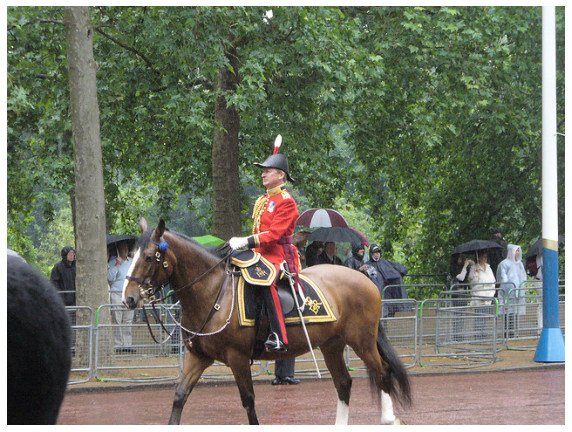

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

im = cv2.imread("./input.jpg")
show_image(im[:,:,::-1])

Configuração e definição do modelo:

In [ ]:
cfg = get_cfg()
config_file="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(config_file))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)  # Let training initialize from model zoo
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:18, 9.36MB/s]                           
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
#classes = outputs["instances"].pred_classes.cpu().numpy()
#masks = outputs['instances'].pred_masks.cpu().numpy()
#boxes = outputs['instances'].pred_boxes.tensor.cpu().numpy()
#[metadata.thing_classes[c] for c in classes]

Visualização de resultado:

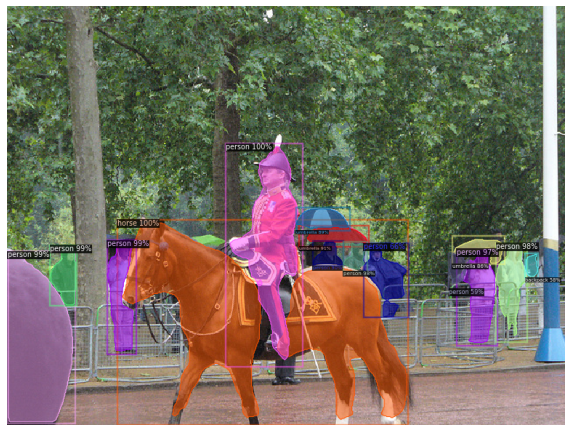

In [ ]:
v = Visualizer(im[:, :, ::-1], metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show_image(v.get_image())

# Camera Test

In [ ]:
#TODO:  USAR CODE SNIPPETS (CAMERA CAPTURE)
#TODO: REALIZAR INFERENCIA

# Video Test

Se apresenta um código que abre um vídeo e itera sobre todos os frames. Utiliza-se este código base para implemtar a inferência sobre um vídeo.

https://www.pexels.com/video/cars-on-highway-854671/

In [ ]:
from tqdm import tqdm

In [ ]:
video_input='Cars On Highway(3).mp4'
video_output='inference.mp4'

# Configuration input video
cap = cv2.VideoCapture(video_input)
frame_width, frame_height = (640,480)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Configuration output video
fourcc =cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(video_output,fourcc, 20.0, (frame_width, frame_height))

cfg = get_cfg()
config_file="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(config_file))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)  # Let training initialize from model zoo
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
predictor = DefaultPredictor(cfg)


for id_frame in tqdm(range(0,num_frames,10)):
  cap.set(cv2.CAP_PROP_POS_FRAMES,id_frame)
  flag, frame = cap.read()

  if flag:
    frame = cv2.resize(frame, (frame_width, frame_height))
    outputs = predictor(frame)
    v = Visualizer(im[:, :, ::-1], metadata, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    show_image(v.get_image())

    out_frame = v.get_image()

    out.write(out_frame[:,:,::-1].astype('uint8'))

cap.release()
out.release()

0it [00:00, ?it/s]
